# Give Me Some Credit

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in Data
train = pd.read_csv(r"/Users/emmanuel/Documents/Portfolio Projects/GiveMeSomeCredit/train_eda.csv").drop(['Unnamed: 0'],axis=1)

In [3]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,ExtremeOpenLines_flag,NumberOfOpenCreditLinesAndLoans_cleaned,OpenLinesBand,ExtremeRealEstate_flag,NumberRealEstateLoansOrLines_cleaned,RealEstateBand,ExtremeDependents_flag,NumberOfDependents_cleaned,NumberOfDependentsMissing_cleaned,DependentsBand
0,1,0.766127,45.0,2,0.802982,9120.0,13,0,6,0,...,0,13,11-15,1,5,4-5,0,2.0,2.0,2
1,0,0.957151,40.0,0,0.121876,2600.0,4,0,0,0,...,0,4,3-5,0,0,0,0,1.0,1.0,1
2,0,0.658180,38.0,1,0.085113,3042.0,2,1,0,0,...,0,2,0-2,0,0,0,0,0.0,0.0,0
3,0,0.233810,30.0,0,0.036050,3300.0,5,0,0,0,...,0,5,3-5,0,0,0,0,0.0,0.0,0
4,0,0.907239,49.0,1,0.024926,63588.0,7,0,1,0,...,0,7,6-10,0,1,1,0,0.0,0.0,0


## Feature Engineering

In [4]:
# Binary delinquency flags
train['HasEverBeen30DaysLate'] = (train['NumberOfTime30-59DaysPastDueNotWorse_cleaned'] > 0).astype(int)
train['HasEverBeen60DaysLate'] = (train['NumberOfTime60-89DaysPastDueNotWorse_cleaned'] > 0).astype(int)
train['HasEverBeen90DaysLate'] = (train['NumberOfTimes90DaysLate_cleaned'] > 0).astype(int)

# High utilisation and high debt flags
train['HighUtilizationFlag'] = (train['RevolvingUtilization_cleaned'] > 0.8).astype(int)
train['HighDebtRatioFlag'] = (train['DebtRatio_cleaned'] > 1).astype(int)

# Credit experience indicators
train['ThinFileFlag'] = (train['NumberOfOpenCreditLinesAndLoans_cleaned'] < 3).astype(int)
train['HomeOwnerFlag'] = (train['NumberRealEstateLoansOrLines_cleaned'] > 0).astype(int)


These flags summarize financial behavior in interpretable binary terms.

In [5]:
# Financial leverage and exposure
train['DebtToIncome'] = train['DebtRatio_cleaned'] * train['MonthlyIncome_imputed']
train['CreditPerLine'] = train['MonthlyIncome_imputed'] / (train['NumberOfOpenCreditLinesAndLoans_cleaned'] + 1)
train['DependentsPerIncome'] = train['NumberOfDependents_cleaned'] / (train['MonthlyIncome_imputed'] + 1)

# Combined delinquency score
train['TotalDelinquencies'] = (train['NumberOfTime30-59DaysPastDueNotWorse_cleaned'] + train['NumberOfTime60-89DaysPastDueNotWorse_cleaned'] +
    train['NumberOfTimes90DaysLate_cleaned'])


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 55 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   SeriousDlqin2yrs                              149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines          149391 non-null  float64
 2   age                                           149377 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse          149391 non-null  int64  
 4   DebtRatio                                     149391 non-null  float64
 5   MonthlyIncome                                 120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans               149391 non-null  int64  
 7   NumberOfTimes90DaysLate                       149391 non-null  int64  
 8   NumberRealEstateLoansOrLines                  149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse          14

## Feature Selection

In [7]:
corr_matrix = train[['SeriousDlqin2yrs', 'age_imputed', 'MonthlyIncome_imputed', 'RevolvingUtilization_cleaned', 'DebtRatio_cleaned', 'NumberOfTimes90DaysLate_cleaned',
                     'NumberOfTime60-89DaysPastDueNotWorse_cleaned', 'NumberOfTime30-59DaysPastDueNotWorse_cleaned', 'NumberOfOpenCreditLinesAndLoans_cleaned',
                     'NumberRealEstateLoansOrLines_cleaned', 'NumberOfDependents_cleaned', 'HasEverBeen30DaysLate', 'HasEverBeen60DaysLate', 'HasEverBeen90DaysLate',
                     'HighUtilizationFlag', 'HighDebtRatioFlag', 'ThinFileFlag', 'HomeOwnerFlag', 'DebtToIncome', 'CreditPerLine', 'DependentsPerIncome',
                     'TotalDelinquencies']].corr()

Text(0.5, 1.0, 'Correlation Matrix of Give Me Some Credit Variables')

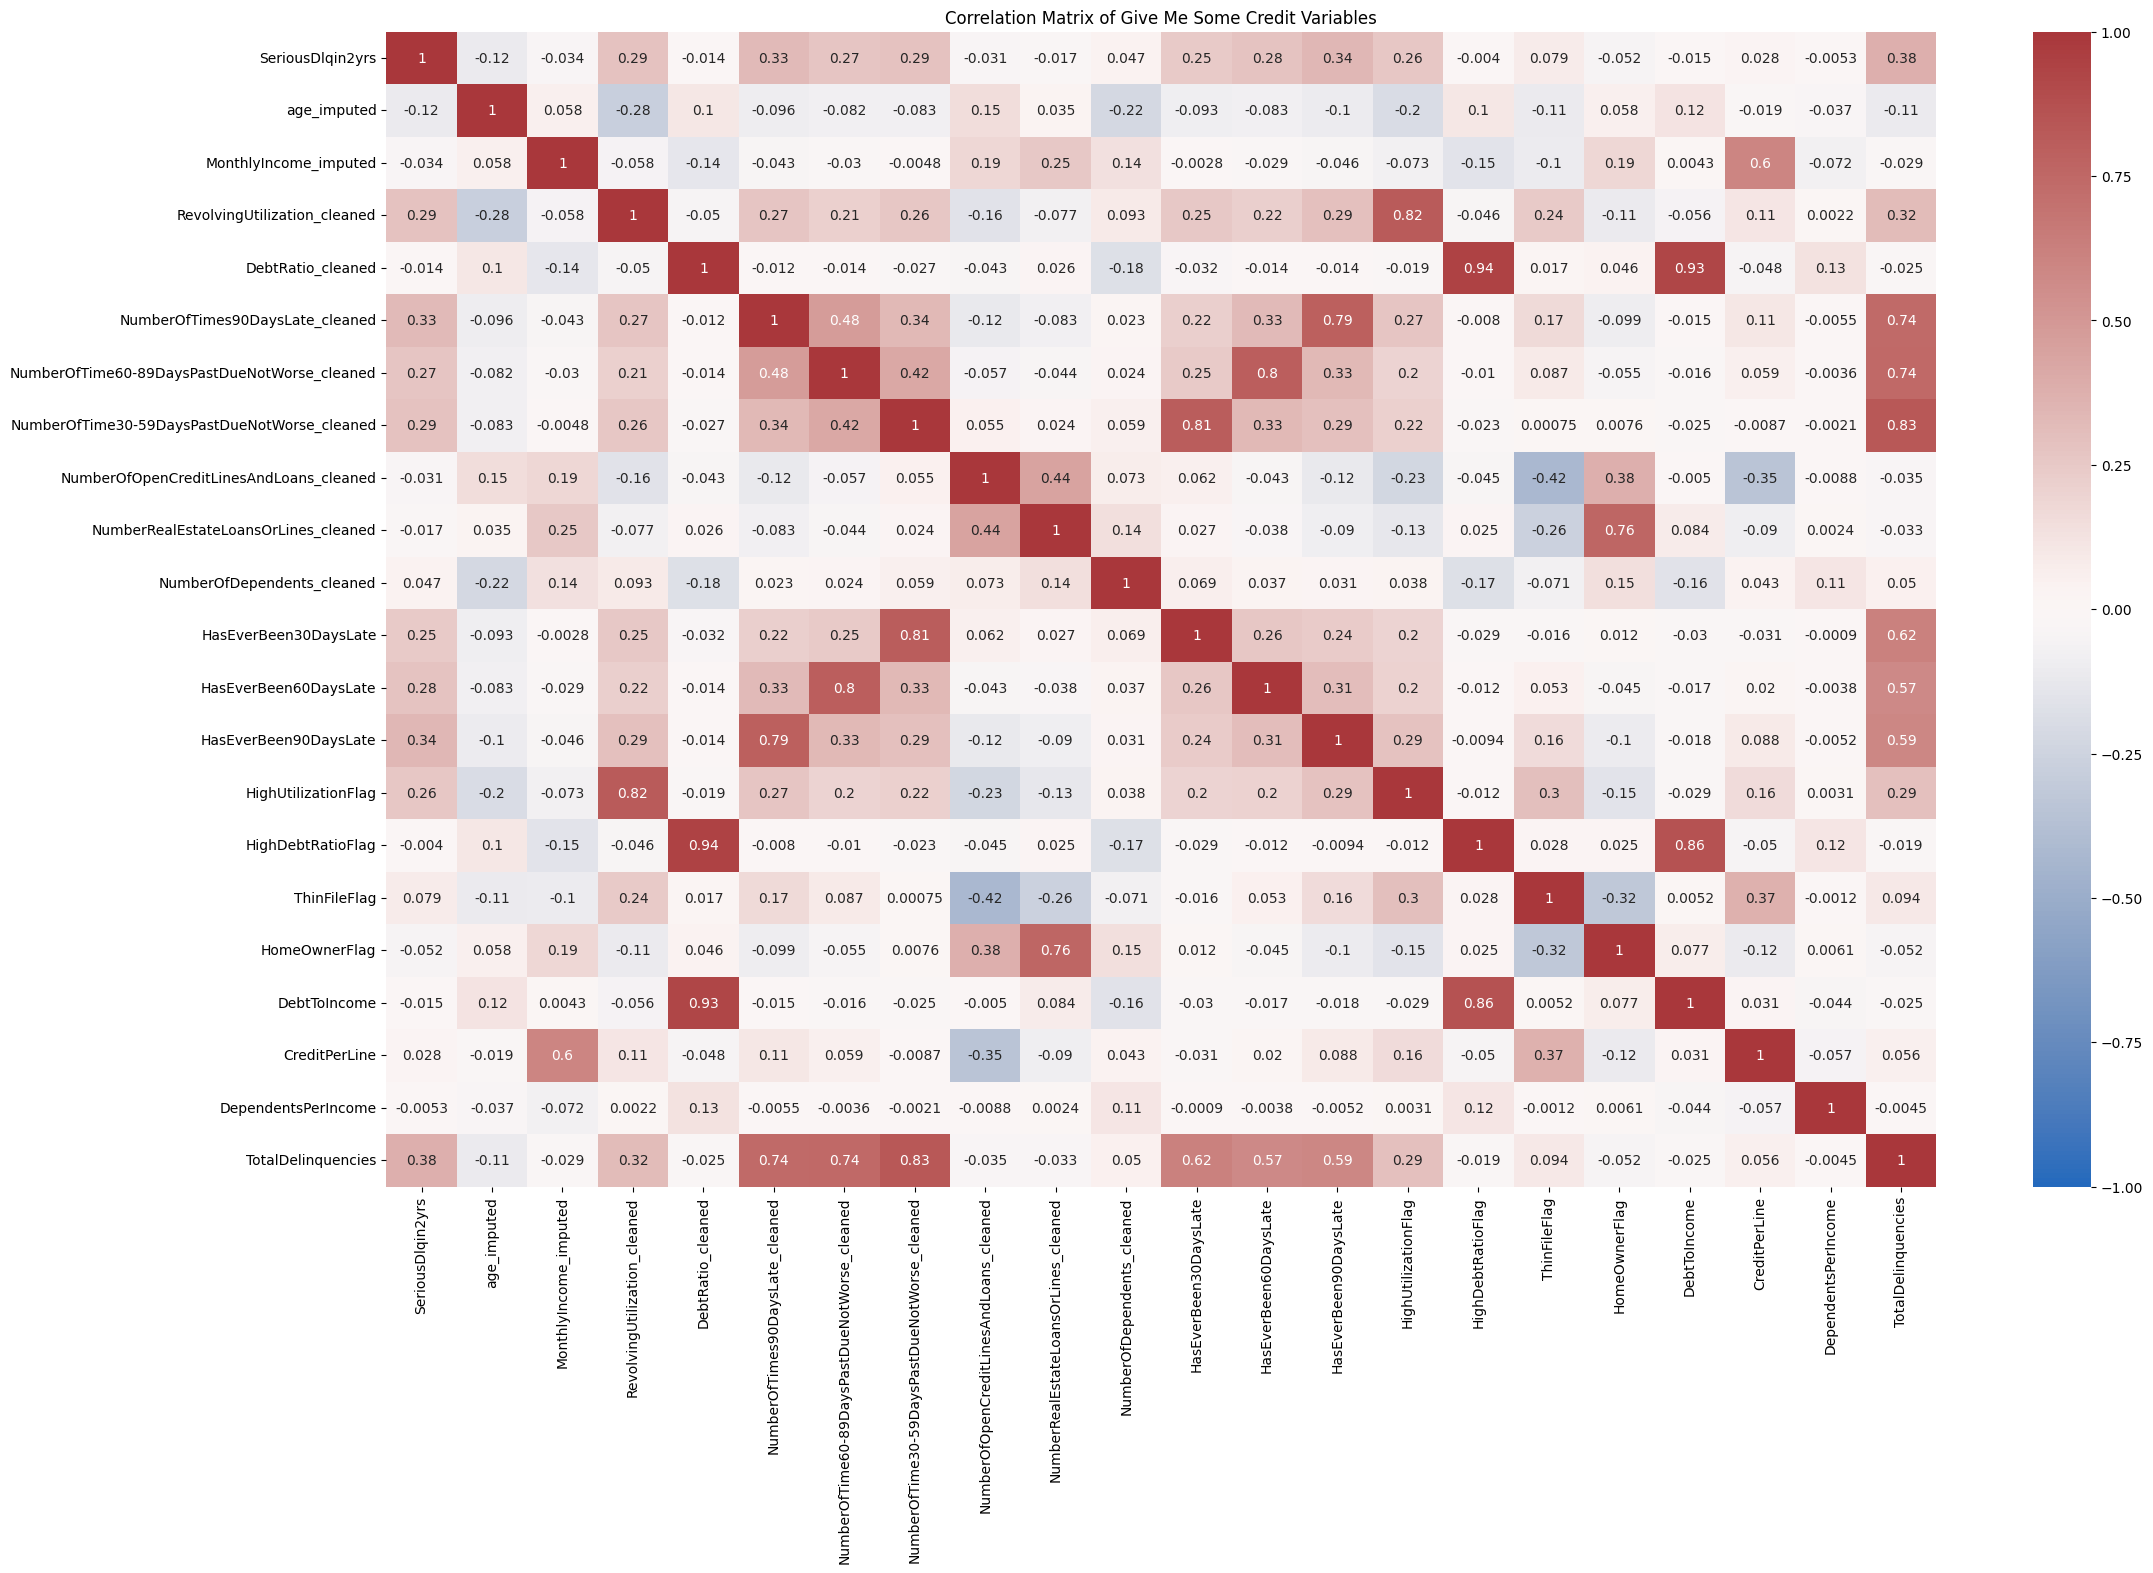

In [8]:
# Heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title("Correlation Matrix of Give Me Some Credit Variables")

- Strongest Predictors: delinquency indicators, revolving utilization, and age.
- Moderate Predictors: income and debt ratio.
- Weak predictors: dependents and real-estate counts

> Need to remove high multicollinearity features

In [9]:
# Dropping Features
corr_dropped_features_matrix = train[['SeriousDlqin2yrs', 'age_imputed', 'MonthlyIncome_imputed', 'RevolvingUtilization_cleaned', 'DebtRatio_cleaned', 
                                      'NumberOfTimes90DaysLate_cleaned','NumberOfOpenCreditLinesAndLoans_cleaned', 'NumberRealEstateLoansOrLines_cleaned', 
                                      'NumberOfDependents_cleaned', 'HasEverBeen90DaysLate', 'DependentsPerIncome','TotalDelinquencies']].corr()

Text(0.5, 1.0, 'Correlation Matrix of Give Me Some Credit Variables')

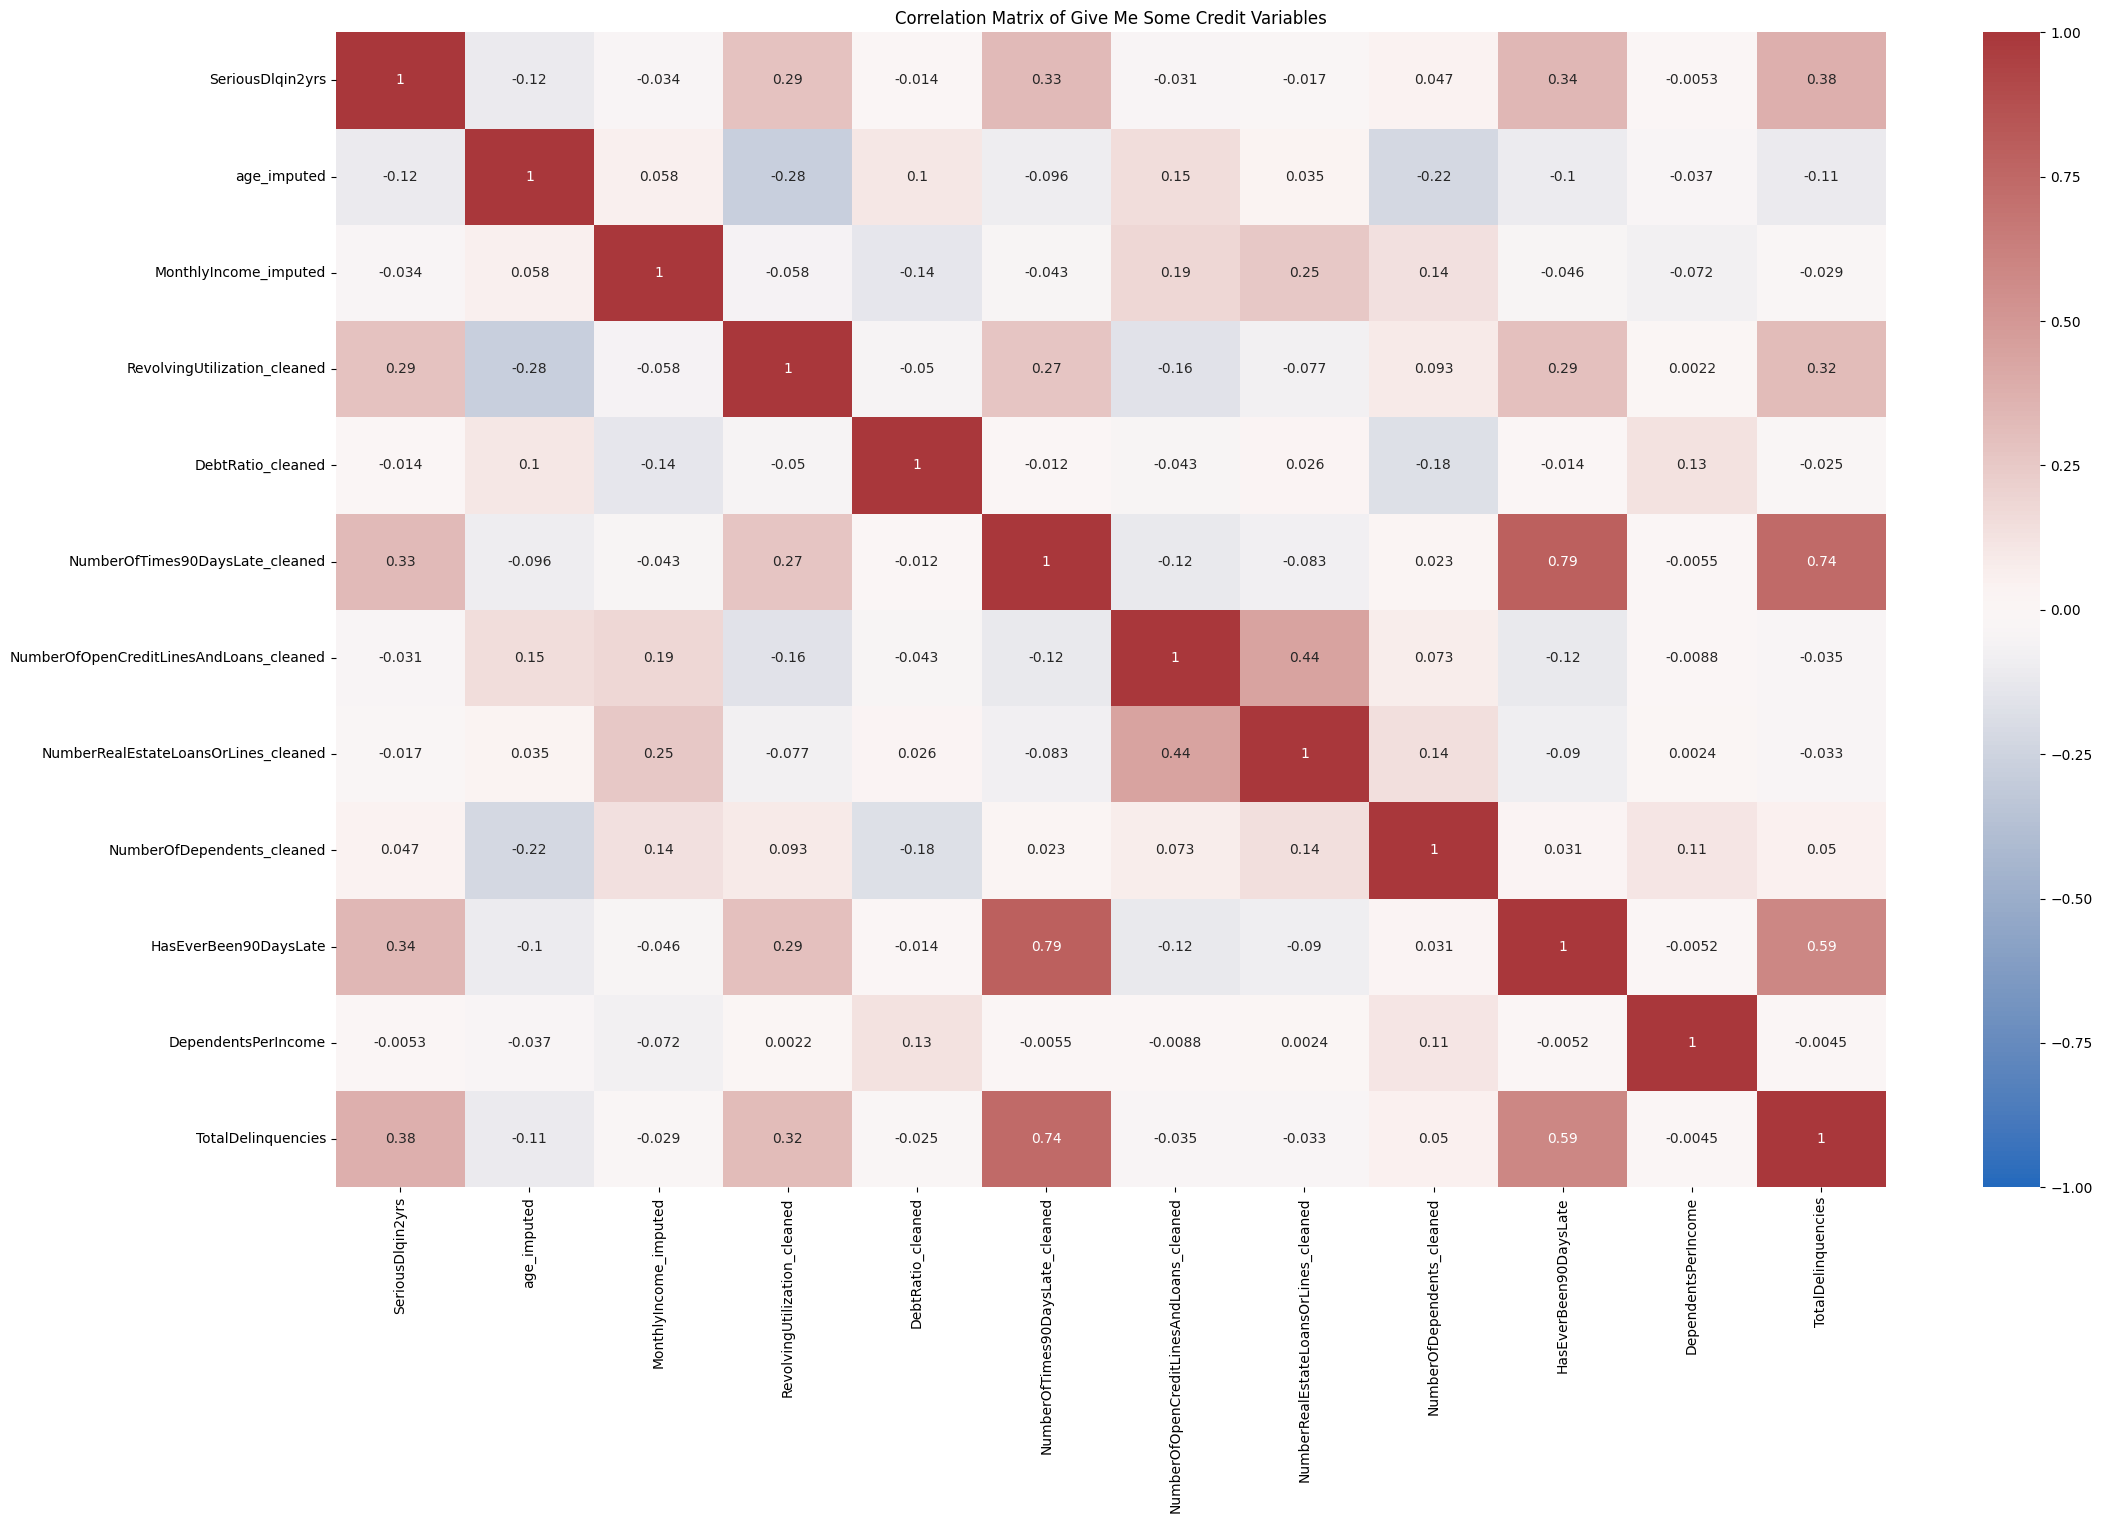

In [10]:
# Heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(corr_dropped_features_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title("Correlation Matrix of Give Me Some Credit Variables")

High feature to feature correlations so need to drop features further

Text(0.5, 1.0, 'Correlation Matrix of Give Me Some Credit Variables')

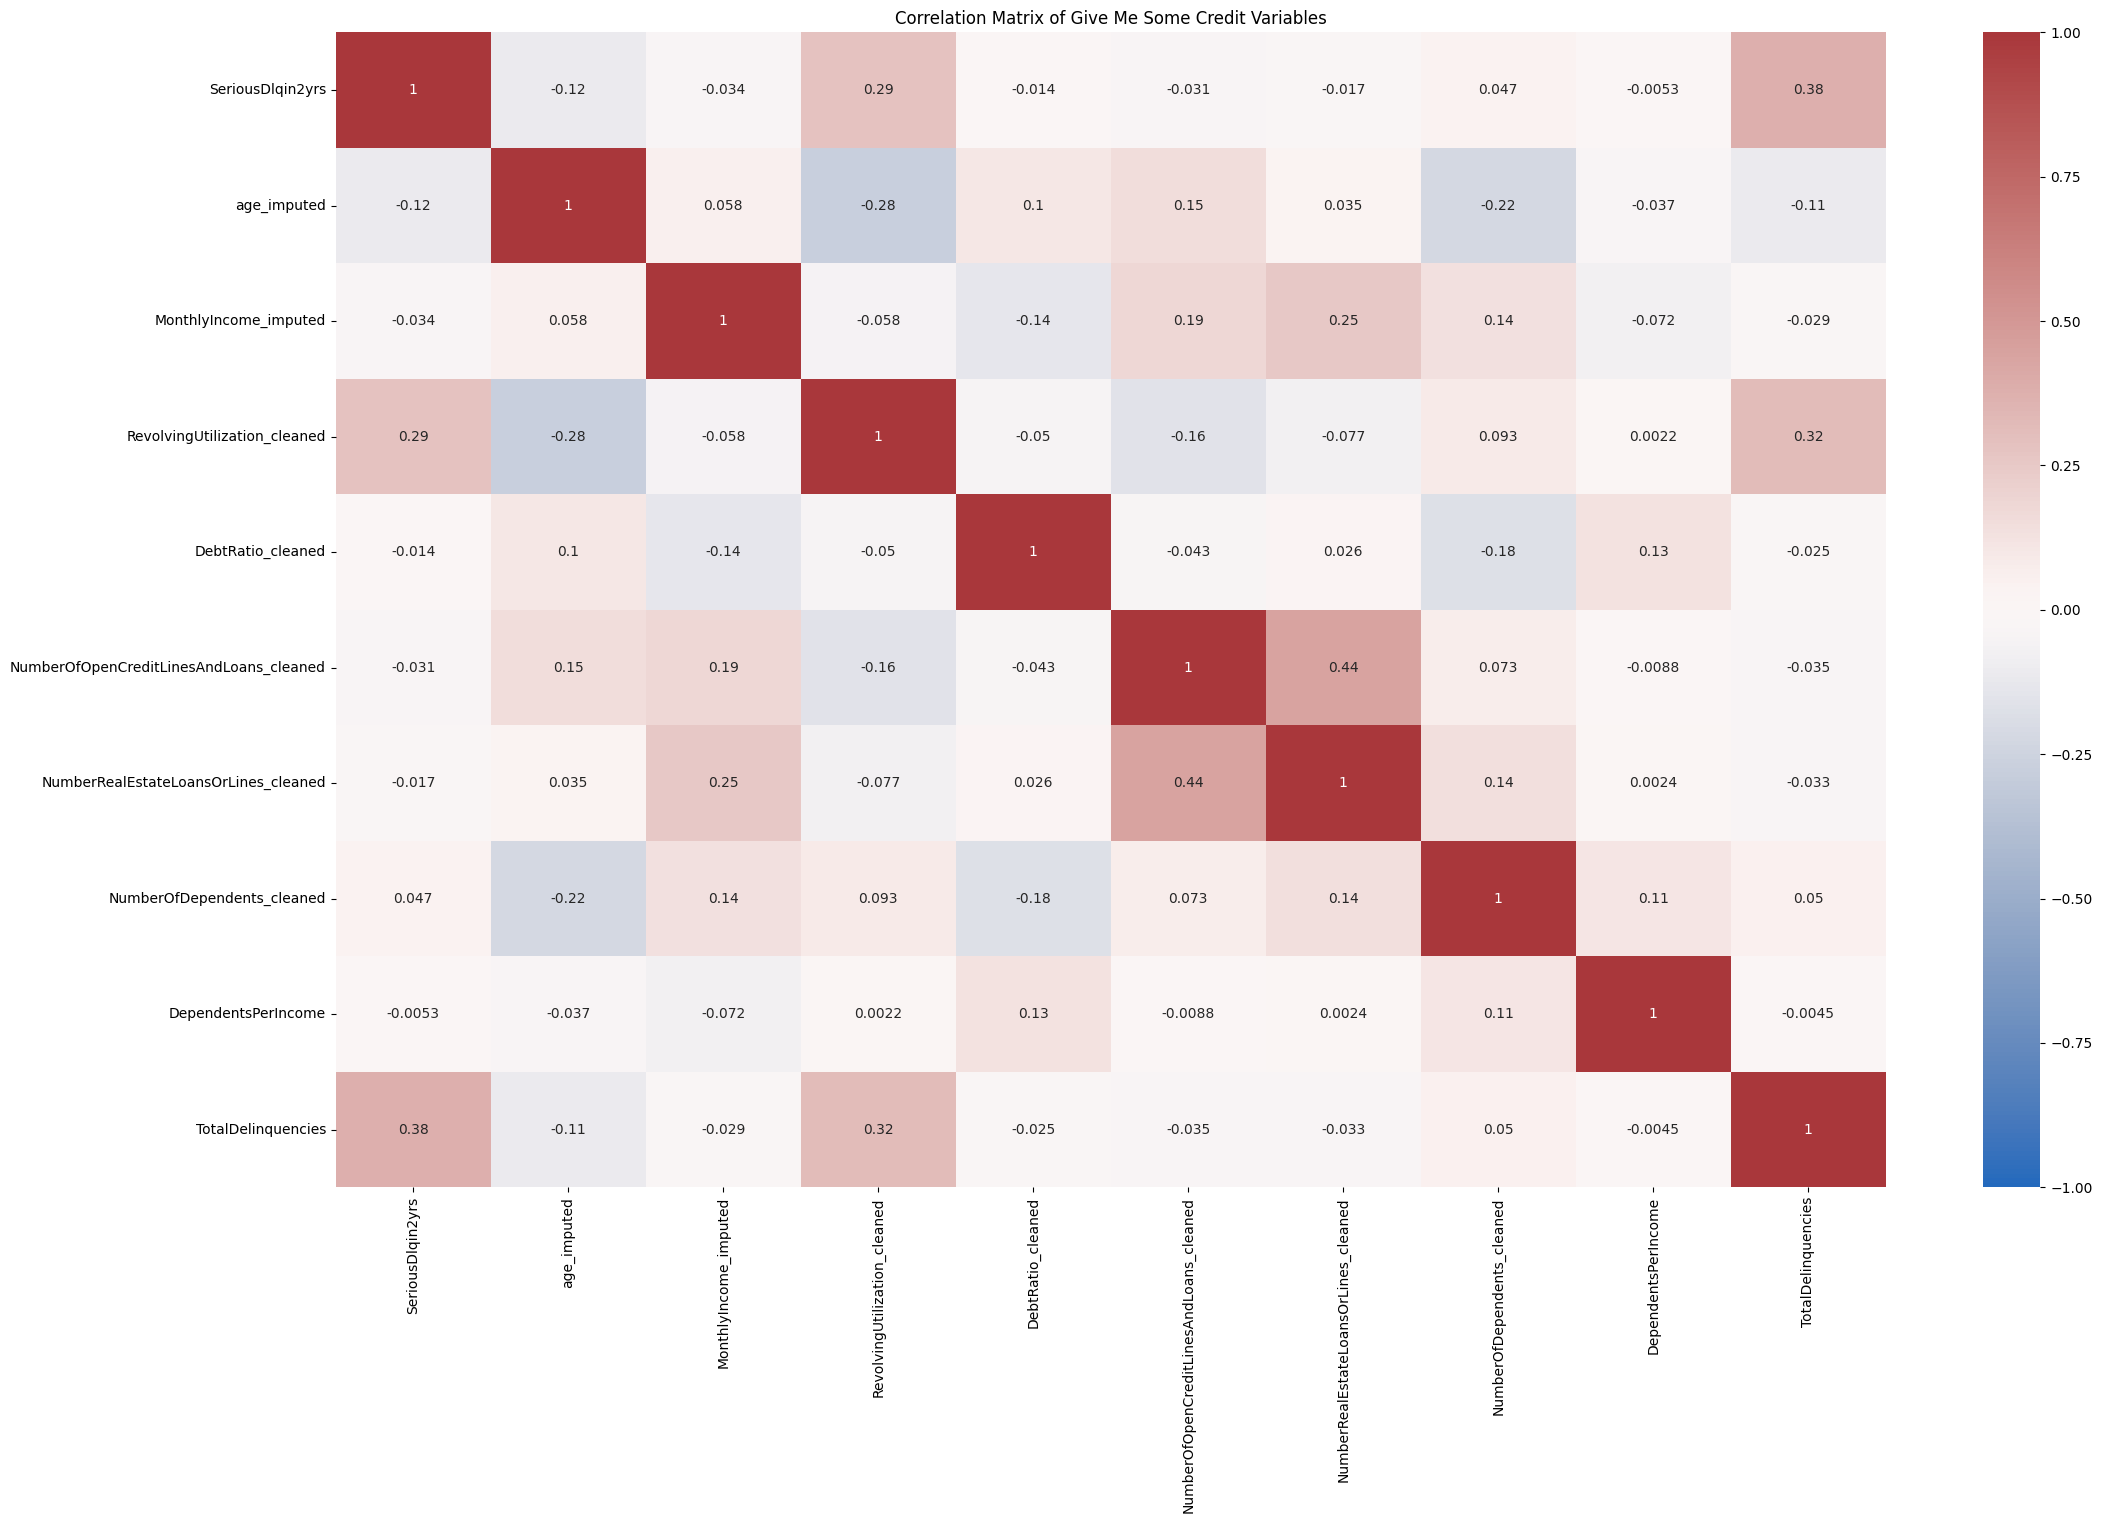

In [16]:
# Final Features Selected
corr_final_features_matrix = train[['SeriousDlqin2yrs', 'age_imputed', 'MonthlyIncome_imputed', 'RevolvingUtilization_cleaned', 
                                 'DebtRatio_cleaned', 'NumberOfOpenCreditLinesAndLoans_cleaned', 'NumberRealEstateLoansOrLines_cleaned', 'NumberOfDependents_cleaned', 
                                 'DependentsPerIncome', 'TotalDelinquencies']].corr()

# Heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(corr_final_features_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title("Correlation Matrix of Give Me Some Credit Variables")

- The remaining variables show low inter-feature correlations, indicating that multicollinearity has been effectively managed.
- Extreme value flags have minimal correlation with their continuous counterparts, confirming that they contribute unique information without redundancy.
- Delinquency-related features remain strongly correlated with the target (SeriousDlqin2yrs), validating their predictive strength.
- Age maintains a clear negative correlation with default risk (older applicants are less likely to default).
- Financial capacity variables (MonthlyIncome_imputed, RevolvingUtilization_cleaned, DebtRatio_cleaned) show moderate independent relationships with default risk.

In [17]:
# Final features selected for modelling using random forest and xgboost 
train_feature_selection = train[['SeriousDlqin2yrs', 'age_imputed', 'MonthlyIncome_imputed', 'RevolvingUtilization_cleaned', 
                                 'DebtRatio_cleaned', 'NumberOfOpenCreditLinesAndLoans_cleaned', 'NumberRealEstateLoansOrLines_cleaned', 'NumberOfDependents_cleaned', 
                                 'DependentsPerIncome', 'TotalDelinquencies']]

# Using missing variables as XGBoost can handle missing and they may be significant 
train_feature_selection_missing = train[['SeriousDlqin2yrs', 'age_imputed', 'Missing_MonthlyIncome_Imputed', 'RevolvingUtilization_cleaned', 
                                        'DebtRatio_cleaned', 'NumberOfOpenCreditLinesAndLoans_cleaned', 'NumberRealEstateLoansOrLines_cleaned', 'NumberOfDependentsMissing_cleaned', 
                                        'DependentsPerIncome', 'TotalDelinquencies']]


In [18]:
train_feature_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 10 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   SeriousDlqin2yrs                         149391 non-null  int64  
 1   age_imputed                              149391 non-null  float64
 2   MonthlyIncome_imputed                    149391 non-null  float64
 3   RevolvingUtilization_cleaned             149391 non-null  float64
 4   DebtRatio_cleaned                        149391 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans_cleaned  149391 non-null  int64  
 6   NumberRealEstateLoansOrLines_cleaned     149391 non-null  int64  
 7   NumberOfDependents_cleaned               149391 non-null  float64
 8   DependentsPerIncome                      149391 non-null  float64
 9   TotalDelinquencies                       149391 non-null  int64  
dtypes: float64(6), int64(4)
memory u

In [19]:
train_feature_selection_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 10 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   SeriousDlqin2yrs                         149391 non-null  int64  
 1   age_imputed                              149391 non-null  float64
 2   Missing_MonthlyIncome_Imputed            120170 non-null  float64
 3   RevolvingUtilization_cleaned             149391 non-null  float64
 4   DebtRatio_cleaned                        149391 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans_cleaned  149391 non-null  int64  
 6   NumberRealEstateLoansOrLines_cleaned     149391 non-null  int64  
 7   NumberOfDependentsMissing_cleaned        145563 non-null  float64
 8   DependentsPerIncome                      149391 non-null  float64
 9   TotalDelinquencies                       149391 non-null  int64  
dtypes: float64(6), int64(4)
memory u

In [20]:
# Extracting Dataset
train_feature_selection.to_csv("/Users/emmanuel/Documents/Portfolio Projects/GiveMeSomeCredit/train_feature_selection.csv", index=True)
train_feature_selection_missing.to_csv("/Users/emmanuel/Documents/Portfolio Projects/GiveMeSomeCredit/train_feature_selection_missing.csv", index=True)